#**CNN - Tutorial 2**#
##**Deep Learning - IT641**##
1. Skip connections
2. Auxillary loss
3. Autoencoder using CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Add, UpSampling2D, Concatenate

##**Add and Concatenate Layers**##
**Add Layer:** It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape). \\
**Concatenate Layer:** Layer that concatenates a list of inputs.

In [ ]:
## ----------Example 1 ---------  ##
#  1 1 1 
#  1 1 1 
#  1 1 1  
#    +
#  2 2 2 
#  2 2 2 
#  2 2 2
#    =
#  3 3 3 
#  3 3 3 
#  3 3 3


x = tf.constant([[1,1,1],
                [1,1,1],
                [1,1,1]])
x = tf.reshape(x, [1, 3, 3, 1])

y = tf.constant([[2,2,2],
                [2,2,2],
                [2,2,2]])
y = tf.reshape(y, [1, 3, 3, 1])
add = Add()([x,y])
add

<tf.Tensor: shape=(1, 3, 3, 1), dtype=int32, numpy=
array([[[[3],
         [3],
         [3]],

        [[3],
         [3],
         [3]],

        [[3],
         [3],
         [3]]]], dtype=int32)>

In [ ]:
## ----------Example 2 ---------  ##
#  1 1 1 
#  1 1 1 
#  1 1 1  
#  concat
#  2 2 2 
#  2 2 2 
#  2 2 2
#    =
#  1 1 1 
#  1 1 1 
#  1 1 1 
#  2 2 2 
#  2 2 2 
#  2 2 2 



x = tf.constant([[1,1,1],
                [1,1,1],
                [1,1,1]])
x = tf.reshape(x, [1, 3, 3, 1])

y = tf.constant([[2,2,2],
                [2,2,2],
                [2,2,2]])
y = tf.reshape(y, [1, 3, 3, 1])
concat = Concatenate(axis=1)([x,y])
concat

<tf.Tensor: shape=(1, 6, 3, 1), dtype=int32, numpy=
array([[[[1],
         [1],
         [1]],

        [[1],
         [1],
         [1]],

        [[1],
         [1],
         [1]],

        [[2],
         [2],
         [2]],

        [[2],
         [2],
         [2]],

        [[2],
         [2],
         [2]]]], dtype=int32)>

In [ ]:
## ----------Example 3 ---------  ##
#  1 1  
#  1 1   
#    +
#  2 2 2 
#  2 2 2 
#  2 2 2



x = tf.constant([[1,1],
                [1,1]])
x = tf.reshape(x, [1, 2, 2, 1])

y = tf.constant([[2,2,2],
                [2,2,2],
                [2,2,2]])
y = tf.reshape(y, [1, 3, 3, 1])

y = MaxPooling2D(pool_size = (1,1),strides=(2,2))(y)
print(y)

# 2 2
# 2 2

add = Add()([x,y])
add

tf.Tensor(
[[[[2]
   [2]]

  [[2]
   [2]]]], shape=(1, 2, 2, 1), dtype=int32)


<tf.Tensor: shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[3],
         [3]],

        [[3],
         [3]]]], dtype=int32)>

##**Convolution Block**##

In [ ]:
def convolution_block(inp,num_filter,pool=False,pool_size=(2,2)):
    x = Conv2D(num_filter,(3,3),activation='relu', padding='same')(inp)
    x = BatchNormalization()(x)
    if pool:
        x = MaxPooling2D(pool_size)(x)
    return x

##**Model**##

In [ ]:
inp = Input(shape=(28,28,1))
conv1 = convolution_block(inp,num_filter=8)
conv2 = convolution_block(conv1,num_filter=16,pool=True)
res1 = convolution_block(conv2,num_filter=16)
res1 = convolution_block(res1,num_filter=16)
skip1 = Add()([res1,conv2])


## AUXILLARY LOSS ##
aux = MaxPooling2D((2,2))(skip1)
aux = Flatten()(aux)
aux = Dense(10,activation='softmax')(aux)

conv3 = convolution_block(skip1,num_filter=32)
conv4 = convolution_block(conv3,num_filter=64,pool=True)
res2 = convolution_block(conv4,num_filter=64)
res2 = convolution_block(res2,num_filter=64)
skip2 = Add()([res2,conv4])

x = MaxPooling2D((2,2))(skip2)
x = Flatten()(x)
x = Dense(10,activation='softmax')(x)

model = Model(inputs=inp,outputs=[x,aux])
#model = Model(inputs=inp,outputs=x)

**Without Auxillary**

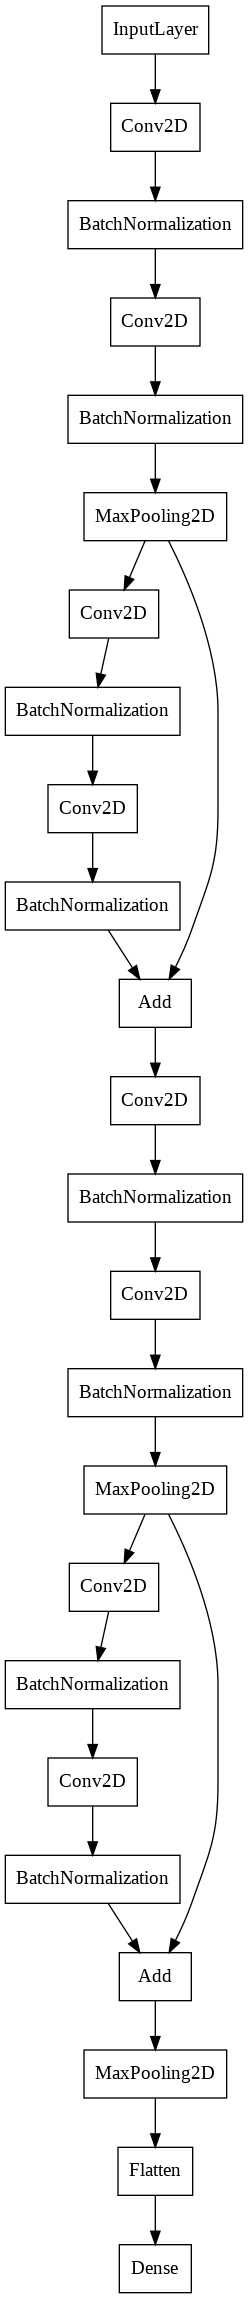

In [ ]:
tf.keras.utils.plot_model(model,'mnist_model.png',show_layer_names=False)

**With Auxillary**

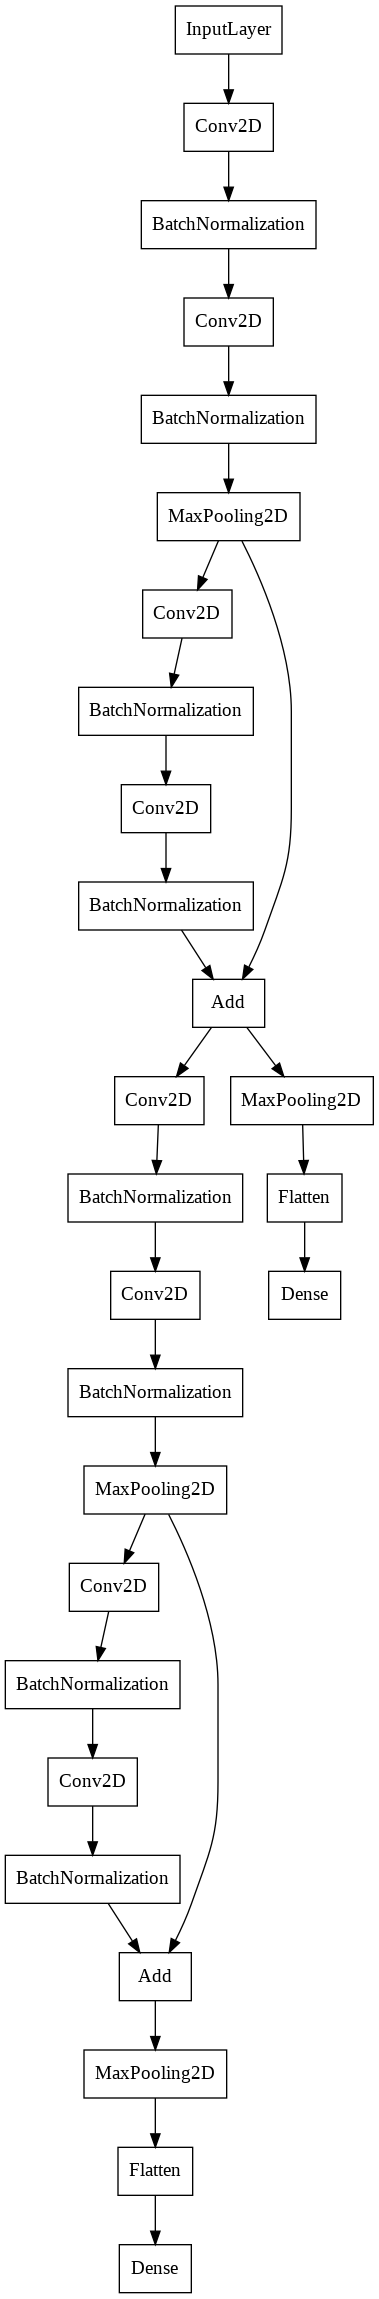

In [ ]:
tf.keras.utils.plot_model(model,'mnist_model.png',show_layer_names=False)

##**Training**##
**MNIST Data**

In [ ]:
(X_train, y_train) ,(X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Normalized Data**

In [ ]:
x_train = X_train/255.
x_train = x_train[...,np.newaxis]
x_test = X_test/255.
x_test = x_test[...,np.newaxis]
print("Train data shape: ",x_train.shape)
print("Test data shape: ",x_test.shape)

Train data shape:  (60000, 28, 28, 1)
Test data shape:  (10000, 28, 28, 1)


In [ ]:
model.compile(optimizer='adam',loss=['sparse_categorical_crossentropy','sparse_categorical_crossentropy'], loss_weights=[0.7,0.3],metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 52s 12ms/step - loss: 0.1655 - dense_9_loss: 0.1395 - dense_8_loss: 0.2263 - dense_9_accuracy: 0.9608 - dense_8_accuracy: 0.9346
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0592 - dense_9_loss: 0.0549 - dense_8_loss: 0.0693 - dense_9_accuracy: 0.9846 - dense_8_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0442 - dense_9_loss: 0.0410 - dense_8_loss: 0.0516 - dense_9_accuracy: 0.9880 - dense_8_accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0347 - dense_9_loss: 0.0311 - dense_8_loss: 0.0429 - dense_9_accuracy: 0.9911 - dense_8_accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0301 - dense_9_loss: 0.0273 - dense_8_loss: 0.0366 - dense_9_accuracy: 0.9919 - dense_8_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - los

**Testing**

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0376 - dense_9_loss: 0.0318 - dense_8_loss: 0.0509 - dense_9_accuracy: 0.9921 - dense_8_accuracy: 0.9862


[0.03755442053079605,
 0.03183290362358093,
 0.05090463161468506,
 0.9921000003814697,
 0.9861999750137329]

##**Autoencoder with CNN**##
**UpSampling2D:** Upsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. 

In [ ]:
## ----------Example 3 ---------  ##
#  1 2 3 
#  4 5 6 
#  7 8 9 

#  1 1 2 2 3 3
#  1 1 2 2 3 3
#  4 4 5 5 6 6
#  4 4 5 5 6 6
#  7 7 8 8 9 9
#  7 7 8 8 9 9 

x = tf.constant([[1,2,3],
                [4,5,6],
                [7,8,9]])
x = tf.reshape(x, [1, 3, 3, 1])
upsample = UpSampling2D(size=(2,2))     
upsample(x)

<tf.Tensor: shape=(1, 6, 6, 1), dtype=int32, numpy=
array([[[[1],
         [1],
         [2],
         [2],
         [3],
         [3]],

        [[1],
         [1],
         [2],
         [2],
         [3],
         [3]],

        [[4],
         [4],
         [5],
         [5],
         [6],
         [6]],

        [[4],
         [4],
         [5],
         [5],
         [6],
         [6]],

        [[7],
         [7],
         [8],
         [8],
         [9],
         [9]],

        [[7],
         [7],
         [8],
         [8],
         [9],
         [9]]]], dtype=int32)>

###**Autoencoder Model**##

In [ ]:
def Autoencoder(input_shape=(28, 28, 1)):
    # Define the input placeholder
    input_img = tf.keras.Input(shape=input_shape)

    # Encoder
    x = Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(input_img)
    x = MaxPooling2D(pool_size=2)(x)
    x = Conv2D(filters=8, kernel_size=3, activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Conv2D(filters=8, kernel_size=3, activation='relu', padding='same')(x)
    encoder = Model(input_img, x, name='encoder')

    # Decoder
    encoded_inp = tf.keras.Input(tensor=encoder.output)
    x = Conv2D(filters=8, kernel_size=3, activation='relu', padding='same')(encoded_inp)
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(x)
    x = UpSampling2D(size=(2, 2))(x)
    decoded = Conv2D(filters=1, kernel_size=3, activation='sigmoid', padding='same')(x)
    decoder = Model(encoded_inp, decoded, name='decoder')

    # Instantiate the autoencoder model
    autoencoder = Model(input_img, decoder(encoder(input_img)), name='autoencoder')

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return encoder, decoder, autoencoder

In [ ]:
encoder,decoder, autoencoder = Autoencoder()

In [ ]:
print(encoder.summary())
print(decoder.summary())

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 8)           584       
Total params: 1,904
Trainable params: 1,904
Non-trainable params: 0
_________________________________________________________

**Training**

In [ ]:
autoencoder.fit(x_train,x_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 38s 6ms/step - loss: 0.1043
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0775
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0743
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0729
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0721
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0716
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0713
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0710
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0707
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0705
Epoch 11/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0703
Epoch 12/20
1875/1875 [==============================] - 11s 6ms/step - lo

In [ ]:
autoencoder.save('/content/drive/MyDrive/Auto_cnn.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Auto_cnn.model/assets


**Reconstructed**

In [ ]:
test = np.expand_dims(x_test[0],axis=0)
decoded = autoencoder.predict(test)

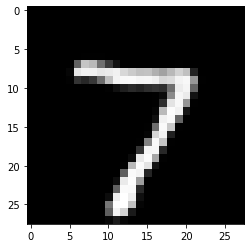

In [ ]:
plt.imshow(decoded.reshape(28, 28),cmap='gray')

**Original**

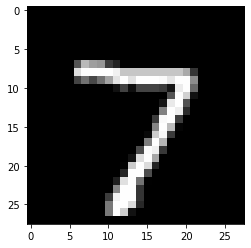

In [ ]:
plt.imshow(x_test[0].reshape(28,28),cmap='gray')